In [1]:
import numpy as np
from glob import glob
from tensorflow.keras.models import load_model
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_01.npz')

In [4]:
[key for key in files.keys()]

['X_train_res',
 'X_test',
 'y_train_res',
 'y_test',
 'objids_test',
 'class_names']

In [44]:
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_*.hdf5')

In [45]:
models = [load_model(path) for path in model_filepaths]

In [46]:
y_pred_list = [ztf_rapid.predict(model, files['X_test']) for model in models]

In [49]:
res = ztf_rapid.runs_result_dataframe(files['y_test'], y_pred_list, files['objids_test'])
res

,class,model_1,model_2,model_3,model_4
objid,,,,,
1_ZTF19aaywlmi,4,4,4,4,4
1_ZTF18abixkdo,4,4,4,4,4
1_ZTF18aaqgbju,4,3,4,4,4
2_ZTF18abnzlai,3,4,1,1,1
1_ZTF19aakizps,4,4,4,4,4
...,...,...,...,...,...
1_ZTF19abwscog,4,4,4,4,4
1_ZTF19acckggd,4,4,4,4,4
1_ZTF18acuscrr,4,4,4,4,4


In [52]:
ztf_rapid.result_class_distribution(res, files['class_names'])

,AGN,CV,SN II,SN Ia
objid,,,,
1_ZTF19aaywlmi,0.00,0.0,0.00,1.00
1_ZTF18abixkdo,0.00,0.0,0.00,1.00
1_ZTF18aaqgbju,0.00,0.0,0.25,0.75
2_ZTF18abnzlai,0.75,0.0,0.00,0.25
1_ZTF19aakizps,0.00,0.0,0.00,1.00
...,...,...,...,...
1_ZTF19abwscog,0.00,0.0,0.00,1.00
1_ZTF19acckggd,0.00,0.0,0.00,1.00
1_ZTF18acuscrr,0.00,0.0,0.00,1.00


In [8]:
y_true, y_pred = ztf_rapid.true_pred_ensemble(
    files['y_test'], 
    y_pred_list, 
    files['objids_test'], 
    files['class_names'], 
    cutoff=0.75)

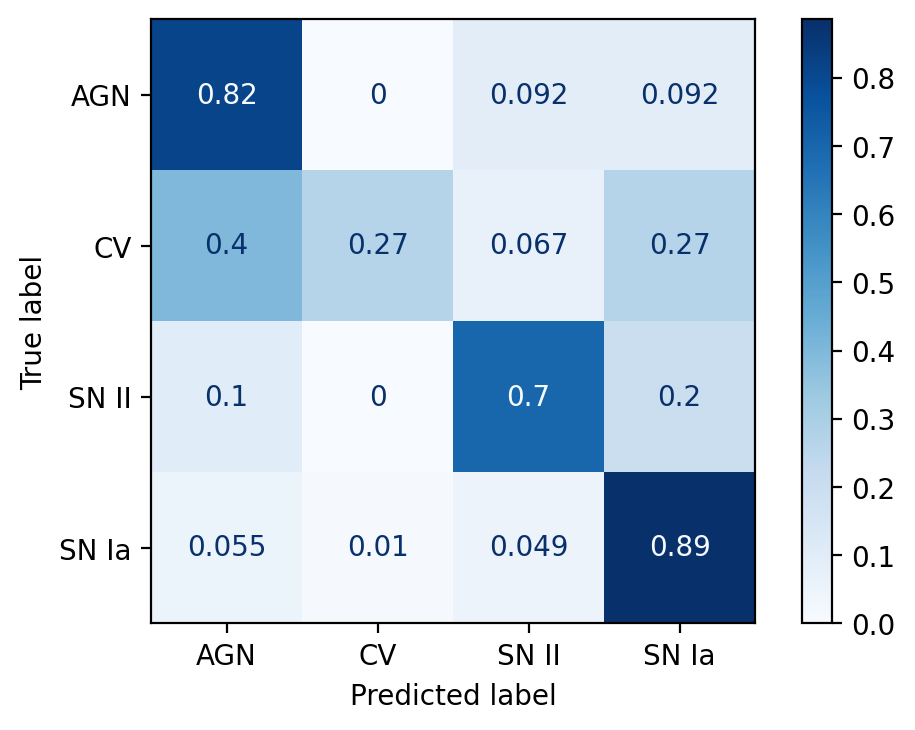

In [13]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])

In [19]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_under/test_under_01.npz')
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_under/test_under_*')

models = [load_model(path) for path in model_filepaths]
y_pred_list = [ztf_rapid.predict(model, files['X_test']) for model in models]
y_true, y_pred = ztf_rapid.true_pred_ensemble(files['y_test'], y_pred_list, files['objids_test'], files['class_names'], cutoff=0.75)

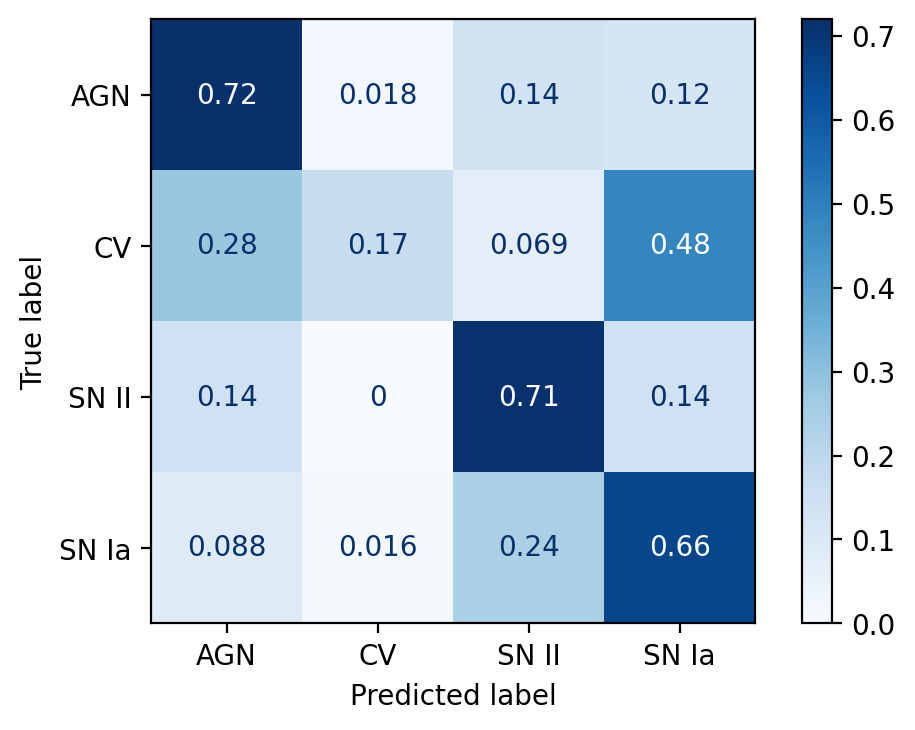

In [20]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])

In [32]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_none/test_none.npz')
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_none/test_none*')

models = [load_model(path) for path in model_filepaths]
y_pred = [ztf_rapid.predict(model, files['X_test']) for model in models][0]
y_pred = np.argmax(y_pred[:,-1,:], axis=1)
y_true = files['y_test']
y_true = np.argmax(y_true[:,0,:], axis=1)

In [33]:
y_true

array([4, 4, 4, ..., 4, 4, 4])

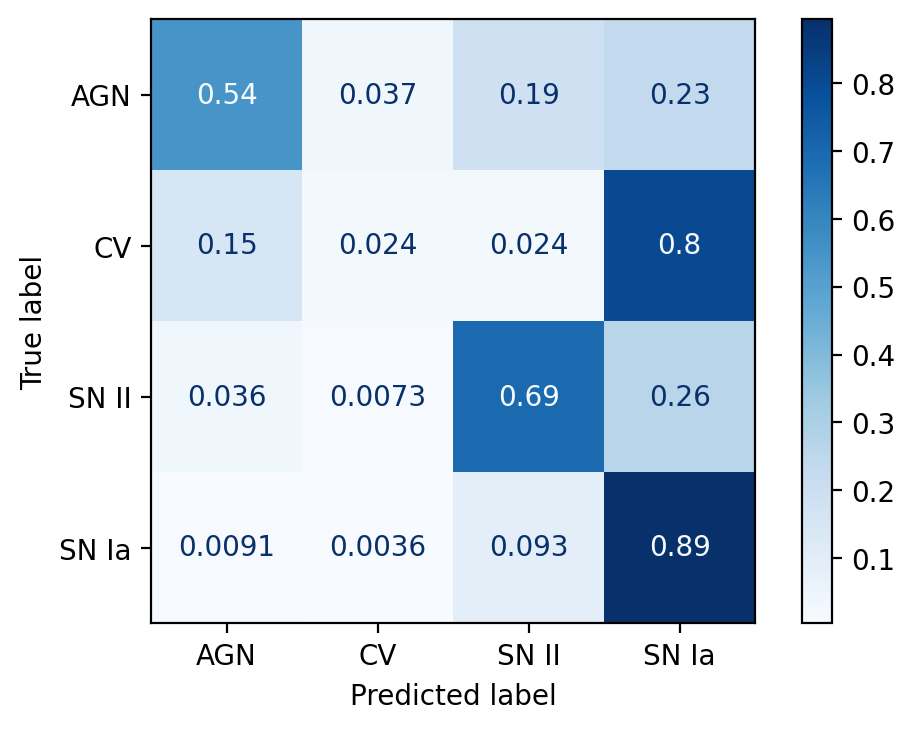

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(
    y_true, 
    y_pred,
    normalize='true'
)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=files['class_names'])
cmd.plot(
    cmap=plt.cm.Blues, 
)

In [53]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_none/test_none.npz')
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_none/test_none*')

models = [load_model(path) for path in model_filepaths]
y_pred = [ztf_rapid.predict(model, files['X_test']) for model in models][0]
y_pred = np.argmax(y_pred[:,-1,:], axis=1)
y_true = files['y_test']
y_true = np.argmax(y_true[:,0,:], axis=1)

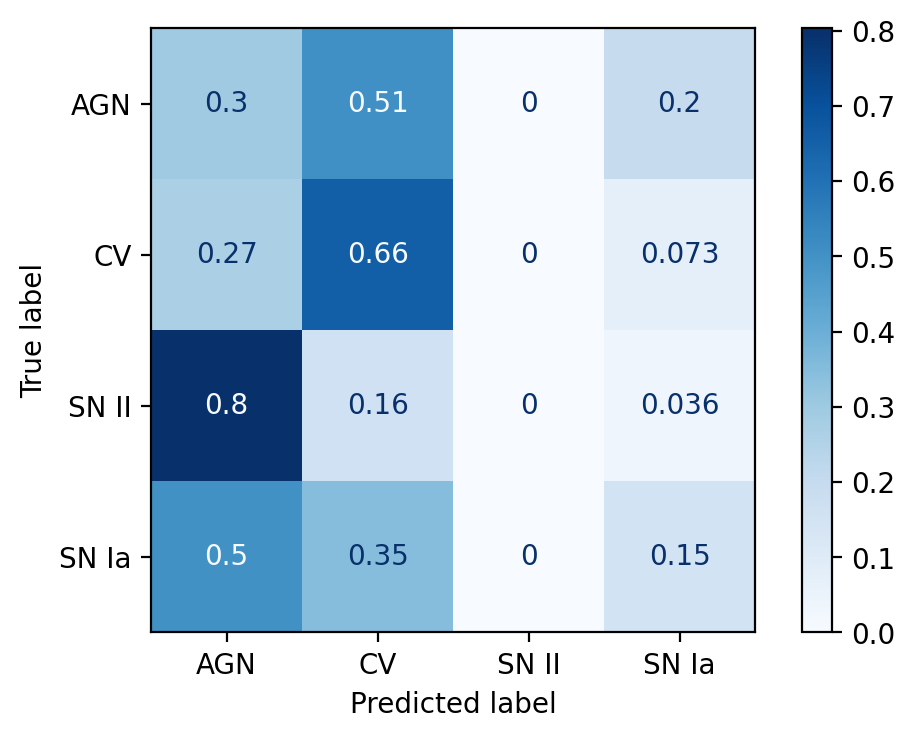

In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(
    y_true, 
    y_pred,
    normalize='true'
)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=files['class_names'])
cmd.plot(
    cmap=plt.cm.Blues, 
)

In [60]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_over/test_over_001.npz')
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_over/test_over_*.hdf5')

In [61]:
len(model_filepaths)

100

In [62]:
models = [load_model(path) for path in model_filepaths]
y_pred_list = [ztf_rapid.predict(model, files['X_test']) for model in models]
y_true, y_pred = ztf_rapid.true_pred_ensemble(files['y_test'], y_pred_list, files['objids_test'], files['class_names'], cutoff=0.75)

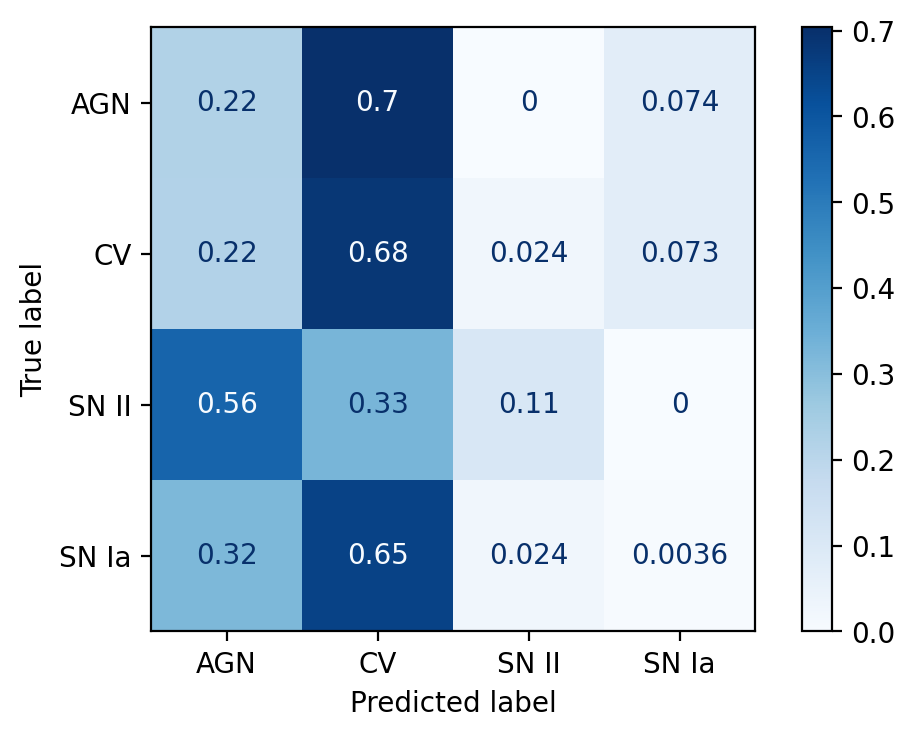

In [63]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])